In [337]:
# prep: import modules and get pwd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
%matplotlib inline
import pymysql
from sqlalchemy import create_engine
import pandas as pd


In [338]:
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [339]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

#list of all table_names in sakila database
query = '''SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' AND TABLE_SCHEMA='sakila' ;'''

data = pd.read_sql_query(query, engine)
data.head(60)

,TABLE_NAME
0,actor
1,address
2,category
3,city
4,country
5,customer
6,film
7,film_actor
8,film_category
9,film_text


In [340]:
# 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.

# data = pd.read_sql_table('film', engine)
# data.head()

# data = pd.read_sql_table('rental', engine)
# data.head()

# data = pd.read_sql_table('inventory', engine)
# data.head()

query = '''select *
from rental
join inventory 
using (inventory_id)
right join film
using (film_id)
join film_category 
using (film_id)
join category
using (category_id)
order by film_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,category_id,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,...,rental_date,customer_id,return_date,staff_id,last_update,store_id,last_update,last_update,name,last_update
0,6,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,...,2005-07-08 19:03:15,431.0,2005-07-11 21:29:15,2.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27
1,6,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,...,2005-08-02 20:13:10,518.0,2005-08-11 21:35:10,1.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27
2,6,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,...,2005-08-21 21:27:43,279.0,2005-08-30 22:26:43,1.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27
3,6,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,...,2021-08-23 13:55:41,130.0,NaT,1.0,2021-08-23 13:55:41,1.0,2006-02-15 05:09:17,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27
4,6,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,...,2005-05-30 20:21:07,411.0,2005-06-06 00:36:07,1.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27


In [358]:
# 2. Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.

query = '''select film_id, rental_date, title, category_id, name, rental_duration, rental_rate, length, replacement_cost, rating, special_features,rental_id,
case when rental_date like '%%2005-08%%' then 1
else 0 end as 'rented_in_Aug_2005?',
case when rental_date like '%%2005-08%%' then 1
else 0 end as 'no_of_times_rented_in_Aug_2005'
from rental
join inventory 
using (inventory_id)
right join film
using (film_id)
join film_category 
using (film_id)
join category
using (category_id)
order by film_id;'''

data = pd.read_sql_query(query, engine)
data.head(60)



,film_id,rental_date,title,category_id,name,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rented_in_Aug_2005?,no_of_times_rented_in_Aug_2005
0,1,2005-07-08 19:03:15,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863.0,0,0
1,1,2005-08-02 20:13:10,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433.0,1,1
2,1,2005-08-21 21:27:43,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714.0,1,1
3,1,2021-08-23 13:55:41,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",16050.0,0,0
4,1,2005-05-30 20:21:07,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972.0,0,0
5,1,2005-06-17 20:24:00,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2117.0,0,0
6,1,2005-07-07 10:41:31,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4187.0,0,0
7,1,2005-07-30 22:02:34,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",9449.0,0,0
8,1,2005-08-23 01:01:01,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",15453.0,1,1
9,1,2005-07-31 21:36:07,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",10126.0,0,0


In [359]:
# data.to_excel("output2.xlsx")  

In [360]:
# 3. Read the data into a Pandas dataframe.

data = pd.read_sql_query(query, engine)
# data.head()ata.shape

In [361]:
data.isna().sum()

film_id                            0
rental_date                       42
title                              0
category_id                        0
name                               0
rental_duration                    0
rental_rate                        0
length                             0
replacement_cost                   0
rating                             0
special_features                   0
rental_id                         42
rented_in_Aug_2005?                0
no_of_times_rented_in_Aug_2005     0
dtype: int64

In [362]:
# 4. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
data.head()

# I will continue with the following dataset;
# → drop inventory_id, rental_id, rental_date, return_date, last_update, last_update, title, description, release_year, last_update


,film_id,rental_date,title,category_id,name,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rented_in_Aug_2005?,no_of_times_rented_in_Aug_2005
0,1,2005-07-08 19:03:15,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863.0,0,0
1,1,2005-08-02 20:13:10,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433.0,1,1
2,1,2005-08-21 21:27:43,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714.0,1,1
3,1,2021-08-23 13:55:41,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",16050.0,0,0
4,1,2005-05-30 20:21:07,ACADEMY DINOSAUR,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972.0,0,0


In [363]:
# data[data['rental_id'] == data['rental_id'] > 0]
data[data['rental_id'] == pd.isna(data['rental_id'])]
# superstore[superstore['Sales'] == superstore['Sales'].max()]

,film_id,rental_date,title,category_id,name,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rented_in_Aug_2005?,no_of_times_rented_in_Aug_2005


In [364]:
data = data.groupby(['film_id']).agg({'category_id': max,'name': max,'rental_duration': max,'rental_rate': max,'length': max,'replacement_cost': max,'rating': max,'special_features': max,'rental_id':'count','rented_in_Aug_2005?':max, 'no_of_times_rented_in_Aug_2005':sum}).reset_index()
# data = data.groupby(['film_id']).agg({'category_id': max,'name': max,'rating': max,'special_features': max,'rental_id':'count','rented_in_Aug_2005?':max, 'no_of_times_rented_in_Aug_2005':sum}).reset_index()

In [365]:
data

,film_id,category_id,name,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rented_in_Aug_2005?,no_of_times_rented_in_Aug_2005
0,1,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",24,1,9
1,2,11,Horror,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",7,1,4
2,3,6,Documentary,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",12,1,6
3,4,11,Horror,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",23,1,6
4,5,8,Family,6,2.99,130,22.99,G,Deleted Scenes,12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6,Documentary,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",7,1,3
996,997,12,Music,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",6,1,3
997,998,11,Horror,6,0.99,105,10.99,NC-17,Deleted Scenes,9,1,2
998,999,3,Children,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",17,1,7


In [366]:
print(data['rented_in_Aug_2005?'].value_counts())
print(data['no_of_times_rented_in_Aug_2005'].value_counts())

1    958
0     42
Name: rented_in_Aug_2005?, dtype: int64
5     137
6     136
3     117
8     110
4     107
7      99
9      85
2      75
10     49
0      42
11     24
12     11
1       6
13      2
Name: no_of_times_rented_in_Aug_2005, dtype: int64


In [367]:
data.rename({'rental_id': 'no_of_times_rented','name': 'category'}, axis=1, inplace=True)
                

In [368]:
data.dtypes

film_id                             int64
category_id                         int64
category                           object
rental_duration                     int64
rental_rate                       float64
length                              int64
replacement_cost                  float64
rating                             object
special_features                   object
no_of_times_rented                  int64
rented_in_Aug_2005?                 int64
no_of_times_rented_in_Aug_2005      int64
dtype: object

In [369]:
# Split special_features column into the respective features

data = pd.concat([data, data['special_features'].str.split(',', expand=True)], axis=1)
data

,film_id,category_id,category,rental_duration,rental_rate,length,replacement_cost,rating,special_features,no_of_times_rented,rented_in_Aug_2005?,no_of_times_rented_in_Aug_2005,0,1,2,3
0,1,6,Documentary,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",24,1,9,Deleted Scenes,Behind the Scenes,None,None
1,2,11,Horror,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",7,1,4,Trailers,Deleted Scenes,None,None
2,3,6,Documentary,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",12,1,6,Trailers,Deleted Scenes,None,None
3,4,11,Horror,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",23,1,6,Commentaries,Behind the Scenes,None,None
4,5,8,Family,6,2.99,130,22.99,G,Deleted Scenes,12,1,3,Deleted Scenes,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6,Documentary,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",7,1,3,Trailers,Behind the Scenes,None,None
996,997,12,Music,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",6,1,3,Trailers,Behind the Scenes,None,None
997,998,11,Horror,6,0.99,105,10.99,NC-17,Deleted Scenes,9,1,2,Deleted Scenes,None,None,None
998,999,3,Children,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",17,1,7,Trailers,Deleted Scenes,None,None


In [370]:
data[data['no_of_times_rented_in_Aug_2005'] == data['no_of_times_rented_in_Aug_2005']=0]

SyntaxError: invalid syntax (<ipython-input-370-3d7aabb2cd5d>, line 1)

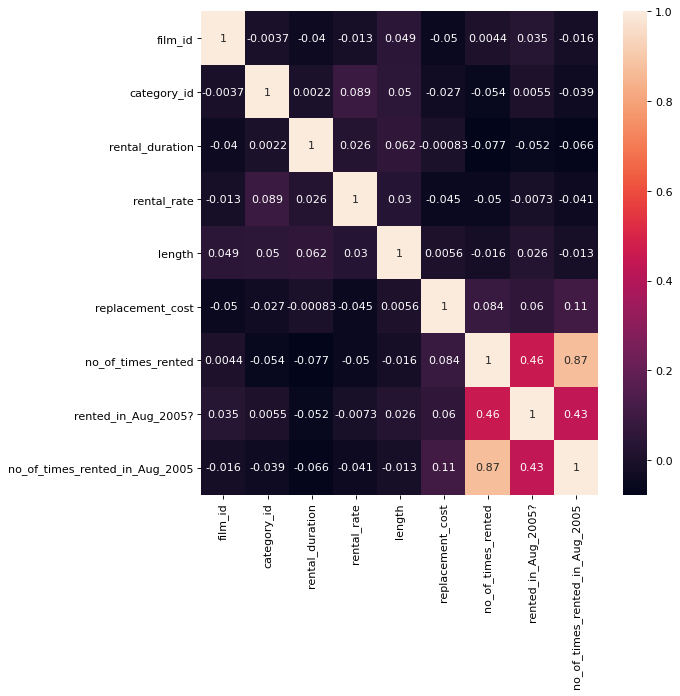

In [371]:
figure(figsize=(8, 8), dpi=80)

correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Except for 'no_of_times_rented', no other strong correlations are noted.  I decided to drop 'no_of_times_rented_in_Aug_2005' as
# this is closely correlated to 'no_of_times_rented'.

# Note: film_id and catetory_id are ignored

In [372]:
data = data.drop(['no_of_times_rented_in_Aug_2005','rental_duration','rental_rate','length','replacement_cost'], axis = 1)

In [373]:
data.shape

(1000, 11)

In [374]:
# The following columns I considered to be categorical information, and transformed them with the OneHotEncoder:

#1.
Cat_OneHotEncoder = data[['category','rating',0,1,2,3]]
Cat_OneHotEncoder

# 2.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(Cat_OneHotEncoder)
categoricals_array = encoder.transform(Cat_OneHotEncoder).toarray()
# onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
# onehot_encoded.head()

# 3. 
final_columns = list()
to_drop_columns = list()      
         
for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            to_drop_columns.append(column)
            final_columns.append(column)
            condition = False
        else:
            final_columns.append(column) 

# 4.            
categoricals_df = pd.DataFrame(data = categoricals_array, columns = final_columns)
# categoricals_df.columns = map(str.lower, categoricals_df.columns)
categoricals_df

new = categoricals_df.groupby(by=categoricals_df.columns, axis=1).sum()
new


# 5. Processing Data: Concat DataFrames
data_all = pd.concat([data,new], axis = 1)
data_all.head()


,film_id,category_id,category,rating,special_features,no_of_times_rented,rented_in_Aug_2005?,0,1,2,...,Music,NC-17,New,PG,PG-13,R,Sci-Fi,Sports,Trailers,Travel
0,1,6,Documentary,PG,"Deleted Scenes,Behind the Scenes",24,1,Deleted Scenes,Behind the Scenes,None,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,11,Horror,G,"Trailers,Deleted Scenes",7,1,Trailers,Deleted Scenes,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,6,Documentary,NC-17,"Trailers,Deleted Scenes",12,1,Trailers,Deleted Scenes,None,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,11,Horror,G,"Commentaries,Behind the Scenes",23,1,Commentaries,Behind the Scenes,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,8,Family,G,Deleted Scenes,12,1,Deleted Scenes,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
categoricals_df.head(60).T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Classics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Comedy,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Documentary,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Family,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Foreign,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Games,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [376]:
data_all.head().T

,0,1,2,3,4
film_id,1,2,3,4,5
category_id,6,11,6,11,8
category,Documentary,Horror,Documentary,Horror,Family
rating,PG,G,NC-17,G,G
special_features,"Deleted Scenes,Behind the Scenes","Trailers,Deleted Scenes","Trailers,Deleted Scenes","Commentaries,Behind the Scenes",Deleted Scenes
no_of_times_rented,24,7,12,23,12
rented_in_Aug_2005?,1,1,1,1,1
0,Deleted Scenes,Trailers,Trailers,Commentaries,Deleted Scenes
1,Behind the Scenes,Deleted Scenes,Deleted Scenes,Behind the Scenes,None
2,None,None,None,None,None


In [377]:
# Here I drop all the original columns before the OneHotEncoder process:

data_all = data_all.drop(['category','special_features','rating',0,1,2,3], axis = 1)

In [378]:
data_all

,film_id,category_id,no_of_times_rented,rented_in_Aug_2005?,Action,Animation,Behind the Scenes,Children,Classics,Comedy,...,Music,NC-17,New,PG,PG-13,R,Sci-Fi,Sports,Trailers,Travel
0,1,6,24,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,11,7,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,6,12,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,11,23,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,8,12,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6,7,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,997,12,6,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,998,11,9,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,999,3,17,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [379]:
# There is some scaling needed looking at certain columns containing larger values.  As the OneHotEncoder columns and boolean column are already 0 to 1,
# I applied the MinMaxScaler on the total df excluding the film_id and category_id.

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X = data_all.drop(['film_id','category_id'], axis = 1)

# Scaling data
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized, columns=X.columns)


In [380]:
x.head()

,no_of_times_rented,rented_in_Aug_2005?,Action,Animation,Behind the Scenes,Children,Classics,Comedy,Commentaries,Deleted Scenes,...,Music,NC-17,New,PG,PG-13,R,Sci-Fi,Sports,Trailers,Travel
0,0.705882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.205882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.352941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.676471,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


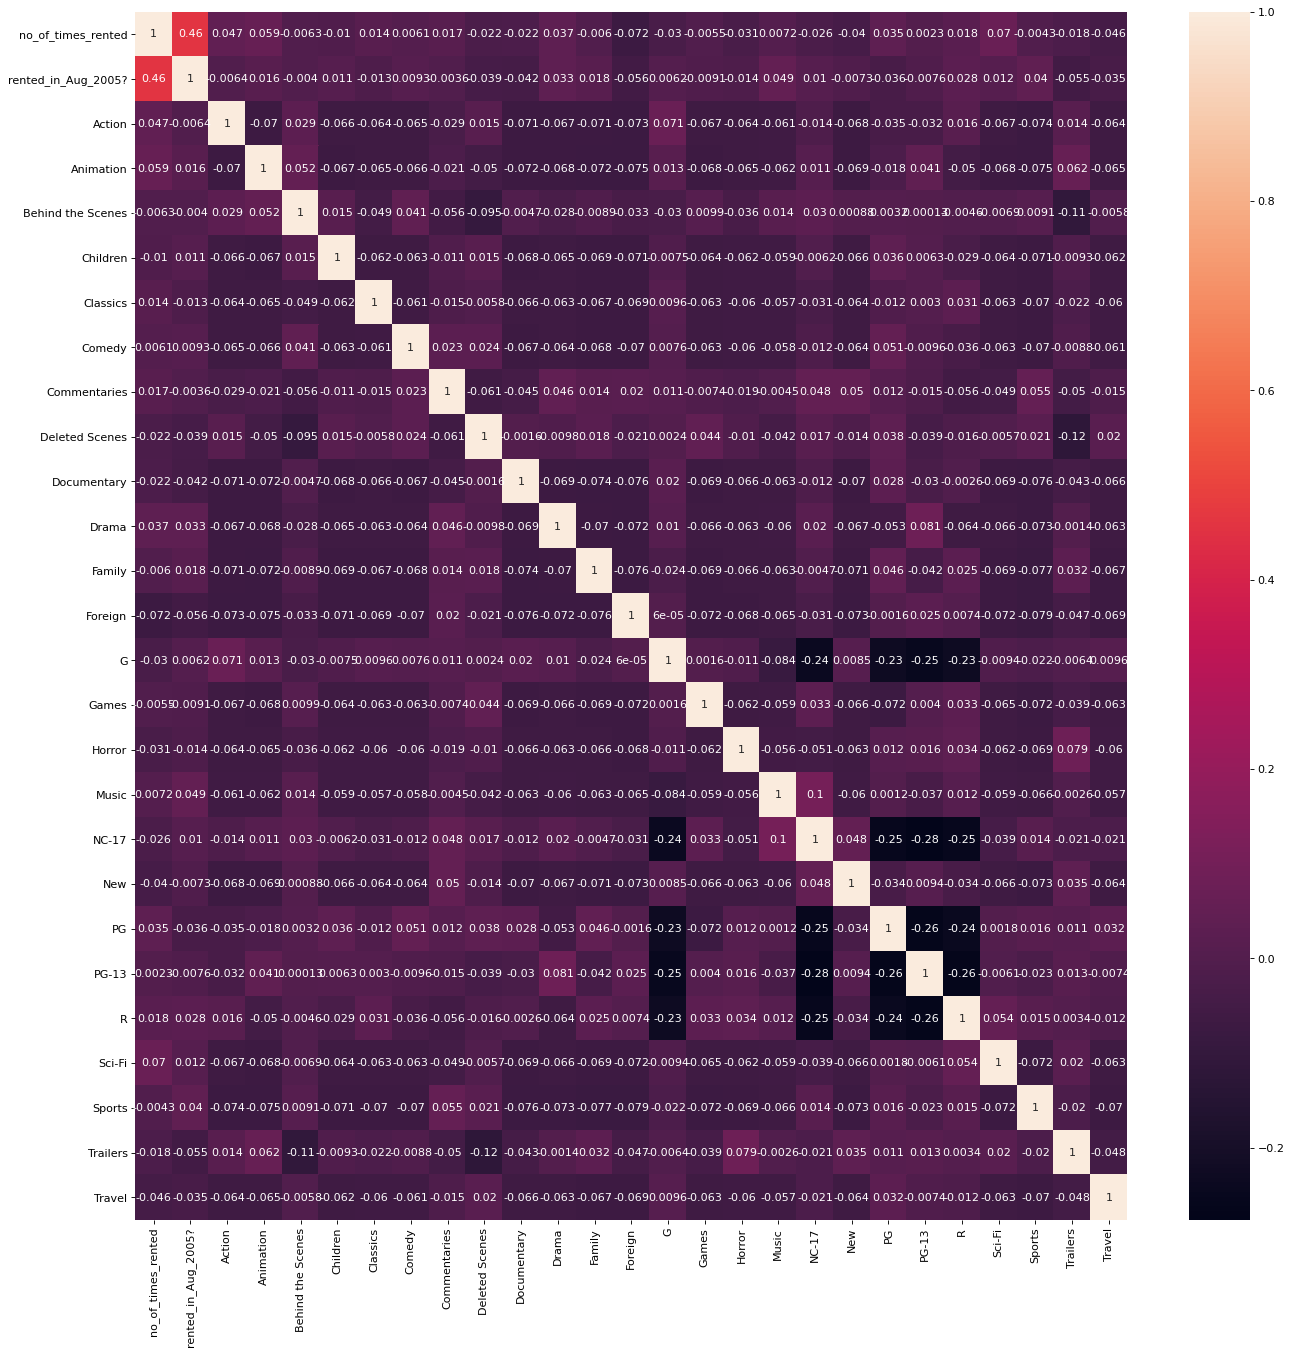

In [381]:
figure(figsize=(20, 20), dpi=80)

correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [382]:
# 5. Create a logistic regression model to predict this variable from the cleaned data.

# build X and y
y = data_all['rented_in_Aug_2005?']
# X = x.drop(['rented_in_Aug_2005?','no_of_times_rented_in_Aug_2005'], axis = 1)
X = x.drop(['rented_in_Aug_2005?'], axis = 1)


In [384]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
no_of_times_rented,0.705882,0.205882,0.352941,0.676471,0.352941,0.617647,0.441176,0.529412,0.352941,0.676471,...,0.470588,0.411765,0.588235,0.382353,0.676471,0.205882,0.176471,0.264706,0.5,0.911765
Action,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Animation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Behind the Scenes,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000
Children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
Classics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Comedy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
Commentaries,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
Deleted Scenes,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
Documentary,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000


In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [386]:
from sklearn.linear_model import LogisticRegression
# Model 1:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [387]:
# classification = LogisticRegression(random_state=0, solver='saga',
#                   multi_class='ovr').fit(X_train, y_train)

In [401]:
X_train.head().T

,82,991,789,894,398
no_of_times_rented,0.617647,0.411765,0.705882,0.735294,0.176471
Action,0.000000,0.000000,0.000000,0.000000,0.000000
Animation,0.000000,0.000000,0.000000,0.000000,0.000000
Behind the Scenes,1.000000,0.000000,0.000000,0.000000,0.000000
Children,0.000000,0.000000,0.000000,0.000000,0.000000
Classics,0.000000,0.000000,0.000000,1.000000,0.000000
Comedy,0.000000,0.000000,0.000000,0.000000,0.000000
Commentaries,0.000000,1.000000,0.000000,1.000000,0.000000
Deleted Scenes,1.000000,0.000000,0.000000,0.000000,1.000000
Documentary,0.000000,1.000000,0.000000,0.000000,0.000000


In [389]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.964

In [390]:
pd.Series(predictions).value_counts()

1    249
0      1
dtype: int64

In [391]:
# I also tried the KNN model:

In [392]:
# Model 2:

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X, y)
predictions_clf = clf.predict(X_test)
clf.score(X_test, y_test)

0.968

In [393]:
# 6. Evaluate the results.

In [394]:
print(y_test.value_counts())

1    240
0     10
Name: rented_in_Aug_2005?, dtype: int64


In [395]:
print(data['rented_in_Aug_2005?'].value_counts())

1    958
0     42
Name: rented_in_Aug_2005?, dtype: int64


In [396]:
# Model 1:  
# Model has a score of 0.964 , and 1 prediction was for false (not rented in Aug 2005), where 10/250 were not rented
# in the test set.

pd.Series(predictions).value_counts()

1    249
0      1
dtype: int64

In [402]:
# Model 2:  
# Model has a score of 0.968, which slightly improves the predictions.

pd.Series(predictions_clf).value_counts()

1    248
0      2
dtype: int64

In [403]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  1,   9],
       [  0, 240]], dtype=int64)

In [404]:
confusion_matrix(y_test, predictions_clf)

array([[  2,   8],
       [  0, 240]], dtype=int64)

In [400]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  |   
# --------------------------
#         1 |   | + |   
# --------------------------